In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab

#Store the data into the variable df
df = pd.read_csv('ETH-USD.csv')

Saving ETH-USD.csv to ETH-USD.csv


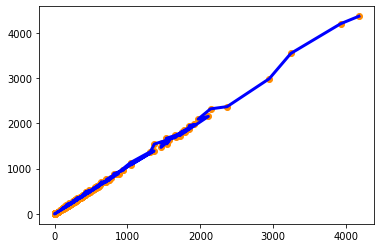

In [ ]:
msk = np.random.rand(len(df)) < 0.8

X = df["Open"]
Y = df["High"]
X_train = np.array(X[msk]).reshape(len(X[msk]),1)
X_test = np.array(X[~msk]).reshape(len(X[~msk]),1)
Y_train = np.array(Y[msk]).reshape(len(X[msk]),1)
Y_test = np.array(Y[~msk]).reshape(len(X[~msk]),1)

clf = svm.SVR(kernel='poly', C=1, degree=1)

X_train = X_train[~np.isnan(X_train)]
Y_train = Y_train[~np.isnan(Y_train)]
X_test = X_test[~np.isnan(X_test)]
Y_test = Y_test[~np.isnan(Y_test)]
X_train = X_train.reshape(-1, 1)
X_train = Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
clf.fit(X_train,Y_train)
predicted_vals = clf.predict(X_test)

plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(X_test, Y_test, color='blue', linewidth=3)
plt.show()

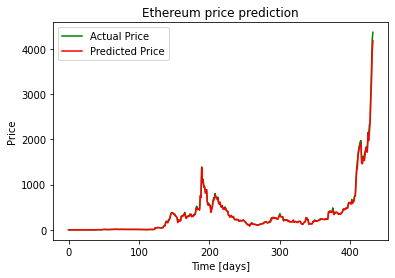

In [ ]:
plt.plot(abs(Y_test), label="Actual Price", color='green')
plt.plot(abs(predicted_vals), label="Predicted Price", color='red')


plt.title('Ethereum price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [ ]:
from sklearn.metrics import mean_absolute_error

error1 = mean_absolute_error(Y_test, predicted_vals)
print(error1)

11.424196710626898


In [ ]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(Y_test, predicted_vals)
print(error)

973.1927786573392


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test, predicted_vals)

0.9964619139071462